# <font color='red'> **A data-driven approach to predict the success of bank telemarketing**</font>
1. The analysis is done on the data collected from the paper [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
2. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)
3. For data and its information [click here](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
4. We are using 5 Data Mining models, Logistic Regression (LR), Decision Tree (DT), Neural Network (NN), Support Vector Machine (SVM) and naive bayes classifier(NB) for the analysis
5. Actually this dataset contains 150 columns, and reduce until 21 column with semi automated selection approach.Its called semi automated because they are using  bussiness intuitive knowledge for feature selection


In [1]:
#import library
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
%matplotlib inline



In [2]:
# readind the data file bank-additional-full to df
df = pd.read_csv("bank-additional-full.csv",delimiter=';') 


In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# checking if the data set as null values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Converting the columns with categorical features to dummy variables

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]],prefix=feature_to_encode).iloc[:,1:]
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [7]:
columns = [ 'job', 'marital','education', 'default', 'housing','loan','contact','month','day_of_week','poutcome','y']

In [8]:
df_copy = df
data = df

In [9]:
for i in columns:
    data = encode_and_bind(data, i)
    

In [10]:
data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


In [11]:
X = data.drop(['y_yes'],axis=1)
Y = data['y_yes'] 

###  Creating Decision Tree and Random Forest Classifier

In [12]:
# creating Decision Tree and RandomForestClassifie
model_dt_E_1 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
model_dt_E_2 = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=0)
model_dt_E_N = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_dt_G_1 = DecisionTreeClassifier(max_depth=1, criterion='gini', random_state=0)
model_dt_G_2 = DecisionTreeClassifier(max_depth=2, criterion='gini', random_state=0)
model_dt_G_N = DecisionTreeClassifier( criterion='gini', random_state=0)



results = {}
kfold = 10

# Findind the cross validation score for Decision Tree

results['DecisionTree_Entropy_1'] = model_selection.cross_val_score(model_dt_E_1, X, Y, cv = kfold).mean()
results['DecisionTree_Entropy_2'] = model_selection.cross_val_score(model_dt_E_2, X, Y, cv = kfold).mean()
results['DecisionTree_Entropy_N'] = model_selection.cross_val_score(model_dt_E_N, X, Y, cv = kfold).mean()
results['DecisionTree_Gini_1'] = model_selection.cross_val_score(model_dt_G_1, X, Y, cv = kfold).mean()
results['DecisionTree_Gini_2'] = model_selection.cross_val_score(model_dt_G_2, X, Y, cv = kfold).mean()
results['DecisionTree_Gini_N'] = model_selection.cross_val_score(model_dt_G_N, X, Y, cv = kfold).mean()

  

In [13]:
results

{'DecisionTree_Entropy_1': 0.83171202500265,
 'DecisionTree_Entropy_2': 0.82141826438114,
 'DecisionTree_Entropy_N': 0.6123009246174487,
 'DecisionTree_Gini_1': 0.83171202500265,
 'DecisionTree_Gini_2': 0.8227286490624183,
 'DecisionTree_Gini_N': 0.6481631515828107}

In [14]:
model_rf_E_1 = RandomForestClassifier(max_depth=1, criterion='entropy')
model_rf_E_2 = RandomForestClassifier(max_depth=2, criterion='entropy')
model_rf_E_N = RandomForestClassifier(criterion='entropy')
model_rf_G_1 = RandomForestClassifier(max_depth=1, criterion='gini')
model_rf_G_2 = RandomForestClassifier(max_depth=2, criterion='gini')
model_rf_G_N = RandomForestClassifier( criterion='gini')

# Findind the cross validation score for Random Forest Classifier

results['RandomForestClassifier_Entropy_1'] = model_selection.cross_val_score(model_rf_E_1, X, Y, cv = kfold).mean()
results['RandomForestClassifier_Entropy_2'] = model_selection.cross_val_score(model_rf_E_2, X, Y, cv = kfold).mean()
results['RandomForestClassifier_Entropy_N'] = model_selection.cross_val_score(model_rf_E_N, X, Y, cv = kfold).mean()
results['RandomForestClassifier_Gini_1'] = model_selection.cross_val_score(model_rf_G_1, X, Y, cv = kfold).mean()
results['RandomForestClassifier_Gini_2'] = model_selection.cross_val_score(model_rf_G_2, X, Y, cv = kfold).mean()
results['RandomForestClassifier_Gini_N'] = model_selection.cross_val_score(model_rf_G_N, X, Y, cv = kfold).mean()

/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ahmedsani

/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ahmedsani

In [15]:
results

{'DecisionTree_Entropy_1': 0.83171202500265,
 'DecisionTree_Entropy_2': 0.82141826438114,
 'DecisionTree_Entropy_N': 0.6123009246174487,
 'DecisionTree_Gini_1': 0.83171202500265,
 'DecisionTree_Gini_2': 0.8227286490624183,
 'DecisionTree_Gini_N': 0.6481631515828107,
 'RandomForestClassifier_Entropy_1': 0.8550971634193573,
 'RandomForestClassifier_Entropy_2': 0.8325152419738142,
 'RandomForestClassifier_Entropy_N': 0.6674184924197217,
 'RandomForestClassifier_Gini_1': 0.8550971634193573,
 'RandomForestClassifier_Gini_2': 0.8507503931425238,
 'RandomForestClassifier_Gini_N': 0.6608622475996698}

### Ploting ROC curve and finding the area under the curve for Decision Tree and  Random Forest Classifier

/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ahmedsani

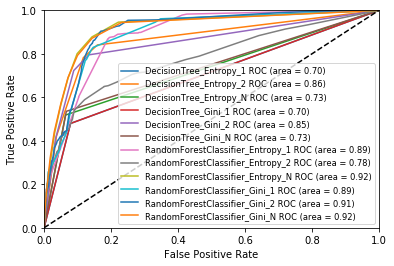

In [16]:
roc_train_X, roc_test_X, roc_train_Y, roc_test_Y = model_selection.train_test_split(X, Y, test_size=0.25)

models = [
    {
        'label' : 'DecisionTree_Entropy_1',
        'model': model_dt_E_1,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },        
    {
        'label' : 'DecisionTree_Entropy_2',
        'model': model_dt_E_2,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },  
    {
        'label' : 'DecisionTree_Entropy_N',
        'model': model_dt_E_N ,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },  
    {
        'label' : 'DecisionTree_Gini_1',
        'model': model_dt_G_1,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },        
    {
        'label' : 'DecisionTree_Gini_2',
        'model': model_dt_G_2,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },  
    {
        'label' : 'DecisionTree_Gini_N',
        'model': model_dt_G_N ,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },  
    {
        'label' : 'RandomForestClassifier_Entropy_1',
        'model': model_rf_E_1,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },        
    {
        'label' : 'RandomForestClassifier_Entropy_2',
        'model': model_rf_E_2,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },  
    {
        'label' : 'RandomForestClassifier_Entropy_N',
        'model': model_rf_E_N ,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },  
    {
        'label' : 'RandomForestClassifier_Gini_1',
        'model': model_rf_G_1,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },        
    {
        'label' : 'RandomForestClassifier_Gini_2',
        'model': model_rf_G_2,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },  
    {
        'label' : 'RandomForestClassifier_Gini_N',
        'model': model_rf_G_N ,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    }
]

for m in models:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

In [17]:
#model_svc_1 = SVC(C=1,kernel='rbf', random_state=0)
#model_svc_0 = SVC(C=0,kernel='rbf', random_state=0)
#model_svc_10 = SVC(C=10,kernel='rbf', random_state=0)

#results['SVM_1'] = model_selection.cross_val_score(model_svc_1, X, Y, cv = kfold).mean()
#results['SVM_0'] = model_selection.cross_val_score(model_svc_0, X, Y, cv = kfold).mean()
#results['SVM_10'] = model_selection.cross_val_score(model_svc_10, X, Y, cv = kfold).mean()

### Creating naive bayes classifier and Ploting ROC curve

In [18]:
model_NB = GaussianNB(priors=None, var_smoothing=1e-09)

results['NB'] = model_selection.cross_val_score(model_NB, X, Y, cv = kfold).mean()

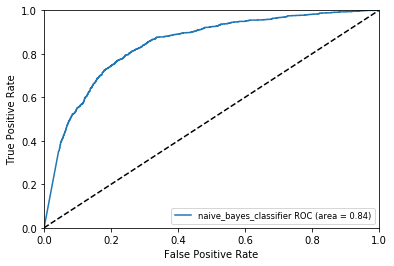

In [19]:
models_NB = [
    {
        'label' : 'naive_bayes_classifier',
        'model': model_NB,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    }
]

for m in models_NB:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

### Creating SVM classifier and Ploting ROC curve

/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


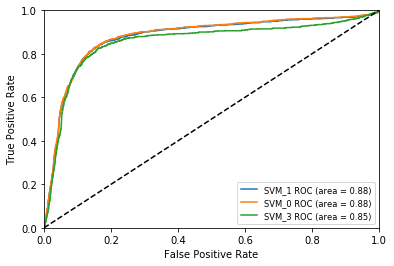

In [34]:
# calculation for C=1,0,3
model_svc_1 = SVC(C=1,kernel='rbf', random_state=0)
model_svc_0 = SVC(C=0.1,kernel='rbf', random_state=0)
model_svc_3 = SVC(C=3,kernel='rbf', random_state=0)

models_SVM = [
    {
        'label' : 'SVM_1',
        'model': model_svc_1,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    }, 
    {
        'label' : 'SVM_0',
        'model': model_svc_0,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    }, 
    {
        'label' : 'SVM_3',
        'model': model_svc_3,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },        
]

for m in models_SVM:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

### Creating Logistic Regression classifier and Ploting ROC curve

In [23]:
model_lr_l1 = LogisticRegression(penalty='l1', tol=0.01) 
model_lr_l2 = LogisticRegression(penalty='l2', tol=0.01) 
results['LogisticRegression_1'] = model_selection.cross_val_score(model_lr_l1, X, Y, cv = kfold).mean()
results['LogisticRegression_2'] = model_selection.cross_val_score(model_lr_l2, X, Y, cv = kfold).mean()

/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

In [24]:
results

{'DecisionTree_Entropy_1': 0.83171202500265,
 'DecisionTree_Entropy_2': 0.82141826438114,
 'DecisionTree_Entropy_N': 0.6123009246174487,
 'DecisionTree_Gini_1': 0.83171202500265,
 'DecisionTree_Gini_2': 0.8227286490624183,
 'DecisionTree_Gini_N': 0.6481631515828107,
 'RandomForestClassifier_Entropy_1': 0.8550971634193573,
 'RandomForestClassifier_Entropy_2': 0.8325152419738142,
 'RandomForestClassifier_Entropy_N': 0.6674184924197217,
 'RandomForestClassifier_Gini_1': 0.8550971634193573,
 'RandomForestClassifier_Gini_2': 0.8507503931425238,
 'RandomForestClassifier_Gini_N': 0.6608622475996698,
 'NB': 0.8082629261264651,
 'LogisticRegression_1': 0.8359144730333765,
 'LogisticRegression_2': 0.89812483072498}

/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ahmedsaninmv/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


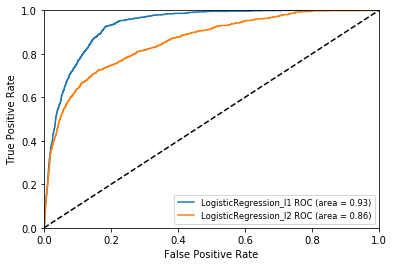

In [27]:
models_LR = [
    {
        'label' : 'LogisticRegression_l1',
        'model': model_lr_l1,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    }, 
    {
        'label' : 'LogisticRegression_l2',
        'model': model_lr_l2,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
]
for m in models_LR:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

### Creating Neural Network classifier and Ploting ROC curve

In [31]:
model_NN_2 = MLPClassifier()
model_NN_3 = MLPClassifier(hidden_layer_sizes=3)
model_NN_4 = MLPClassifier(hidden_layer_sizes=4)
model_NN_5 = MLPClassifier(hidden_layer_sizes=5)
model_NN_6 = MLPClassifier(hidden_layer_sizes=6)
model_NN_7 = MLPClassifier(hidden_layer_sizes=7)
model_NN_8 = MLPClassifier(hidden_layer_sizes=8)
results['Neural Network_2'] = model_selection.cross_val_score(model_NN_2, X, Y, cv = kfold).mean() 
results['Neural Network_3'] = model_selection.cross_val_score(model_NN_3, X, Y, cv = kfold).mean() 
results['Neural Network_4'] = model_selection.cross_val_score(model_NN_4, X, Y, cv = kfold).mean() 
results['Neural Network_5'] = model_selection.cross_val_score(model_NN_5, X, Y, cv = kfold).mean() 
results['Neural Network_6'] = model_selection.cross_val_score(model_NN_6, X, Y, cv = kfold).mean() 
results['Neural Network_7'] = model_selection.cross_val_score(model_NN_7, X, Y, cv = kfold).mean() 
results['Neural Network_8'] = model_selection.cross_val_score(model_NN_8, X, Y, cv = kfold).mean() 

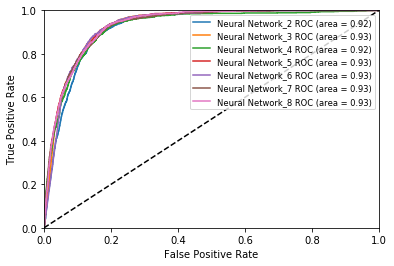

In [33]:

models_NN = [
    {
        'label' : 'Neural Network_2',
        'model': model_NN_2,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    }, 
    {
        'label' : 'Neural Network_3',
        'model': model_NN_3,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
    {
        'label' : 'Neural Network_4',
        'model': model_NN_4,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
    {
        'label' : 'Neural Network_5',
        'model': model_NN_5,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
    {
        'label' : 'Neural Network_6',
        'model': model_NN_6,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
    {
        'label' : 'Neural Network_7',
        'model': model_NN_7,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
    {
        'label' : 'Neural Network_8',
        'model': model_NN_8,
        'roc_train': roc_train_X,
        'roc_test': roc_test_X,
        'roc_train_class': roc_train_Y,        
        'roc_test_class': roc_test_Y,        
    },
]
for m in models_NN:
    m['model'].probability = True
    probas = m['model'].fit(m['roc_train'], m['roc_train_class']).predict_proba(m['roc_test'])
    fpr, tpr, thresholds = roc_curve(m['roc_test_class'], probas[:, 1])
    roc_auc  = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], roc_auc))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=0, fontsize='small')
plt.show()

In [32]:
results

{'DecisionTree_Entropy_1': 0.83171202500265,
 'DecisionTree_Entropy_2': 0.82141826438114,
 'DecisionTree_Entropy_N': 0.6123009246174487,
 'DecisionTree_Gini_1': 0.83171202500265,
 'DecisionTree_Gini_2': 0.8227286490624183,
 'DecisionTree_Gini_N': 0.6481631515828107,
 'RandomForestClassifier_Entropy_1': 0.8550971634193573,
 'RandomForestClassifier_Entropy_2': 0.8325152419738142,
 'RandomForestClassifier_Entropy_N': 0.6674184924197217,
 'RandomForestClassifier_Gini_1': 0.8550971634193573,
 'RandomForestClassifier_Gini_2': 0.8507503931425238,
 'RandomForestClassifier_Gini_N': 0.6608622475996698,
 'NB': 0.8082629261264651,
 'LogisticRegression_1': 0.8359144730333765,
 'LogisticRegression_2': 0.89812483072498,
 'Neural Network': 0.8143306094867588,
 'Neural Network_2': 0.814161679354408,
 'Neural Network_3': 0.884990598419695,
 'Neural Network_4': 0.8952362398348029,
 'Neural Network_5': 0.8460871986993077,
 'Neural Network_6': 0.7702990654073372,
 'Neural Network_7': 0.8645694781324087,
 '

## 1. From the differnent methods used I found out that random forrest classifier with Max depth not given gave the best results
## 2. In the research papaer from which I took the data set they where saying Neural Network gave the best results